# HOTEL BOOKING DEMAND ANALYSIS

## DOMAIN:
HOSPITALITY & TOURISM ANALYTICS

## AIM OF THE PROJECT



The main goal of this project is to analyze hotel booking data to understand:

What factors affect booking cancellations

Guest booking patterns

Seasonal trends

Customer behavior

How hotels can reduce cancellations and improve revenue


This analysis helps hotels make better decisions in marketing, pricing, staffing, and inventory management.


## ABOUT THE DATASET

#### ✅ Source URL

#### https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

#### ✅Rows:
~85,500 bookings

#### ✅Columns:
32 features

#### ✅Data From Years:
2015 – 2017

#### ✅Hotels included:

City Hotel

Resort Hotel




#### The dataset contains detailed information such as:

Booking dates

Stay duration

Number of guests

Meal type

Market segment (online, travel agents, direct, etc.)

Deposit type

ADR (Average Daily Rate)

Whether the customer cancelled or not

## DATA LOADING AND INITIAL OVERVIEW

### Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [ ]:
df = pd.read_csv("HOTEL BOOKINGS DATASET FOR PROJECT.csv")

### View the shape of the dataset

This shows the total number of rows and columns in the dataset

In [ ]:
df.shape

(85597, 32)

### Display first 5 rows

This helps you quickly understand the structure of the dataset and how values are stored

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Check data types of each column

This shows which columns are integers, floats, or objects (strings), Missing values count, Memory usage

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85597 entries, 0 to 85596
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85597 non-null  object 
 1   is_canceled                     85597 non-null  int64  
 2   lead_time                       85597 non-null  int64  
 3   arrival_date_year               85597 non-null  int64  
 4   arrival_date_month              85597 non-null  object 
 5   arrival_date_week_number        85597 non-null  int64  
 6   arrival_date_day_of_month       85597 non-null  int64  
 7   stays_in_weekend_nights         85597 non-null  int64  
 8   stays_in_week_nights            85597 non-null  int64  
 9   adults                          85597 non-null  int64  
 10  children                        85593 non-null  float64
 11  babies                          85597 non-null  int64  
 12  meal                            

### Summary statistics

This gives basic statistical summaries like: Mean, Median, Standard deviation, Min/max and Unique values for categorical data.It helps identify outliers and unusual patterns early

In [ ]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,85597,85597.000000,85597.000000,85597.000000,85597,85597.000000,85597.000000,85597.000000,85597.000000,85597.000000,...,85597,72633.000000,5133.000000,85597.000000,85597,85597.000000,85597.000000,85597.000000,85597,85597
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Canceled,10/21/2015
freq,45537,NaN,NaN,NaN,9803,NaN,NaN,NaN,NaN,NaN,...,70859,NaN,NaN,NaN,63351,NaN,NaN,NaN,42975,1461
mean,NaN,0.515953,109.859586,2016.034931,NaN,27.538488,15.706345,0.968363,2.636085,1.850953,...,NaN,109.992662,186.664913,2.950466,NaN,97.304385,0.070458,0.467353,NaN,NaN
std,NaN,0.499748,111.329765,0.740025,NaN,13.986958,8.787501,1.044739,2.049997,0.595190,...,NaN,117.973836,132.959831,19.964940,NaN,53.326963,0.259725,0.743321,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,19.000000,2015.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,62.800000,0.000000,0.000000,NaN,NaN
50%,NaN,1.000000,73.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,34.000000,178.000000,0.000000,NaN,88.000000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,170.000000,2017.000000,NaN,39.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,240.000000,274.000000,0.000000,NaN,120.000000,0.000000,1.000000,NaN,NaN


## DATA PRE-PROCESSING (CLEANING)

### ✅Handling Missing Values

#### Check missing values:

In [ ]:
df.isnull().sum().sort_values(ascending=False)

company                           80464
agent                             12964
country                             487
children                              4
arrival_date_month                    0
arrival_date_week_number              0
hotel                                 0
is_canceled                           0
stays_in_weekend_nights               0
arrival_date_day_of_month             0
adults                                0
stays_in_week_nights                  0
babies                                0
meal                                  0
lead_time                             0
arrival_date_year                     0
distribution_channel                  0
market_segment                        0
previous_bookings_not_canceled        0
is_repeated_guest                     0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
previous_cancellations                0
deposit_type                          0


#### Fill missing children values with 0

In [ ]:
df["children"] = df["children"].fillna(0)

#### Fill agent and company with 0 (since they are ID numbers)

In [ ]:
df["agent"] = df["agent"].fillna(0)
df["company"] = df["company"].fillna(0)

#### Fill country with 'Unknown'

In [ ]:
df["country"] = df["country"].fillna("Unknown")

### ✅Remove Duplicates

Duplicates can affect statistics, correlations, and visualizations.Removing them ensures accuracy.

In [ ]:
df.drop_duplicates(inplace=True)

### ✅Convert data types

Dates must be converted to datetime type for: time-series analysis, extracting month/year, visualizations.

##### Convert date columns:

In [ ]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

##### Create a full arrival date:

In [ ]:
df["arrival_date"] = pd.to_datetime(
    df["arrival_date_year"].astype(str) + "-" +
    df["arrival_date_month"] + "-" +
    df["arrival_date_day_of_month"].astype(str)
)

### ✅ Create New Derived Columns

These new columns help analyze hotel trends like: seasonal demand, room occupancy, pricing changes, cancellation patterns.

#### Total nights stayed

In [ ]:
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

#### Total number of guests

In [ ]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]

#### Arrival month & year

In [ ]:
df["arrival_month"] = df["arrival_date"].dt.month
df["arrival_year"] = df["arrival_date"].dt.year
df["arrival_month_name"] = df["arrival_date"].dt.month_name()

### ✅ Final Check After Cleaning

Ensures no remaining unwanted missing values.

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

## EXPLORATORY DATA ANALYSIS(EDA)

### Objective

To explore the hotel booking dataset, identify patterns, trends, relationships, and behaviors that influence booking cancellations and guest characteristics.


###  Univariate Analysis (Single-Variable Exploration)-Distributions and counts

We analyze each column separately to understand its distribution and patterns.

#### Examples for this dataset:

Most frequently booked hotel type (City Hotel vs Resort Hotel)

Distribution of lead time (how early people book)

Most common meal type

Distribution of customer types (Transient, Contract, etc.)

Cancellation rate

Peak months for bookings



 ### ✅Overall cancellation rate

Overall cancellation rate: 51.60%


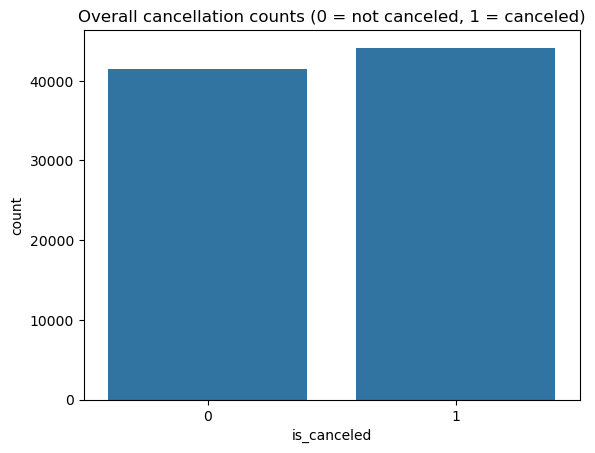

In [ ]:
if 'is_canceled' in df.columns:
    cancel_rate = df['is_canceled'].mean()
    print(f"Overall cancellation rate: {cancel_rate:.2%}")

    sns.countplot(x='is_canceled', data=df)
    plt.title("Overall cancellation counts (0 = not canceled, 1 = canceled)")
    plt.xlabel("is_canceled")
    plt.ylabel("count")
    plt.show()

### ✅Hotel Type Distribution

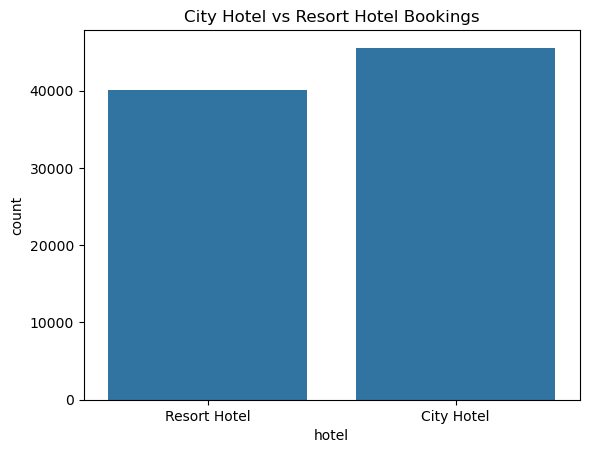

In [ ]:
sns.countplot(x='hotel', data=df)
plt.title("City Hotel vs Resort Hotel Bookings")
plt.show()

### ✅ADR (Price) Distribution

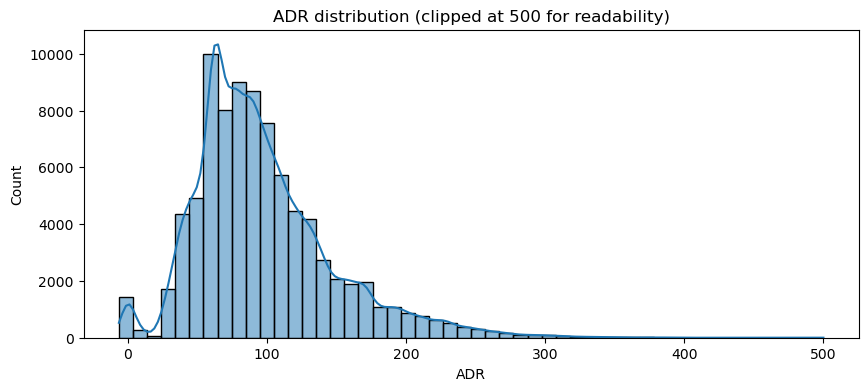

In [ ]:
if 'adr' in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df['adr'].clip(upper=500), bins=50, kde=True) # clip extreme ADR outliers for readability
    plt.title("ADR distribution (clipped at 500 for readability)")
    plt.xlabel("ADR")
    plt.show()

### ✅Lead Time Distribution

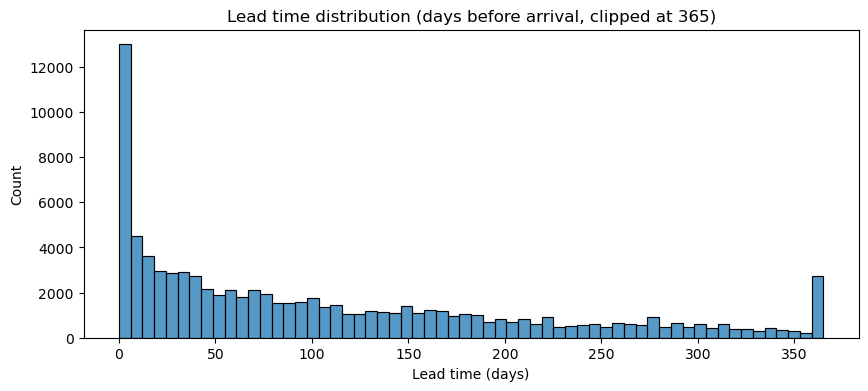

In [ ]:
if 'lead_time' in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(df['lead_time'].clip(upper=365), bins=60) # clip to 1 year for readability
    plt.title("Lead time distribution (days before arrival, clipped at 365)")
    plt.xlabel("Lead time (days)")
    plt.show()

### ✅Popular arrival months (seasonality)

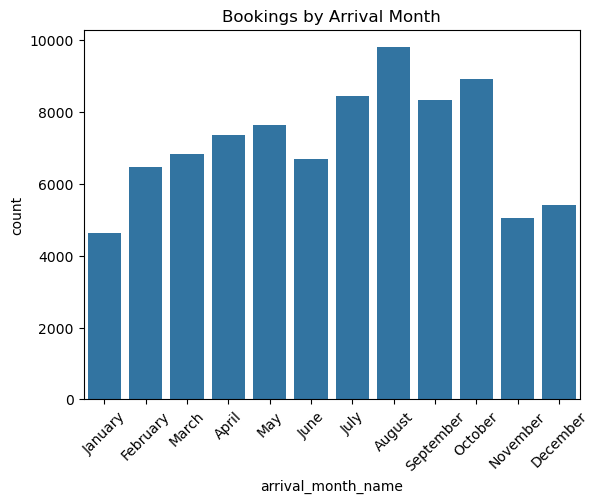

In [ ]:
if 'arrival_date' in df.columns:
    df['arrival_month_name'] = df['arrival_date'].dt.month_name()
    month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
    sns.countplot(x='arrival_month_name', data=df, order=month_order)
    plt.xticks(rotation=45)
    plt.title("Bookings by Arrival Month")
    plt.show()

### Bivariate analysis(Relationship Between Two Variables) — relationships & comparisons

This helps identify factors that influence booking outcomes.

#### Important relationships for this project:

Cancellations by hotel type

Lead time vs cancellation

ADR (price per night) vs hotel type

Market segment vs cancellation

ADR vs lead_time scatter


#### Common techniques:

Groupby() comparisons

Boxplots

Scatterplots

Correlation heatmaps

### ✅Cancellations by hotel type

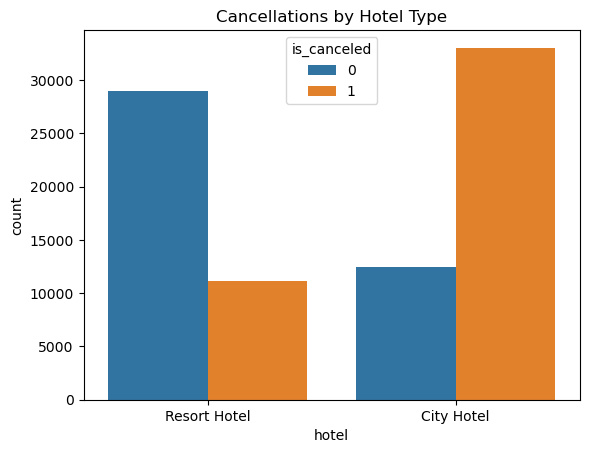

In [ ]:
if set(['hotel','is_canceled']).issubset(df.columns):
    sns.countplot(x='hotel', hue='is_canceled', data=df)
    plt.title("Cancellations by Hotel Type")
    plt.show()

### ✅Lead time vs cancellation

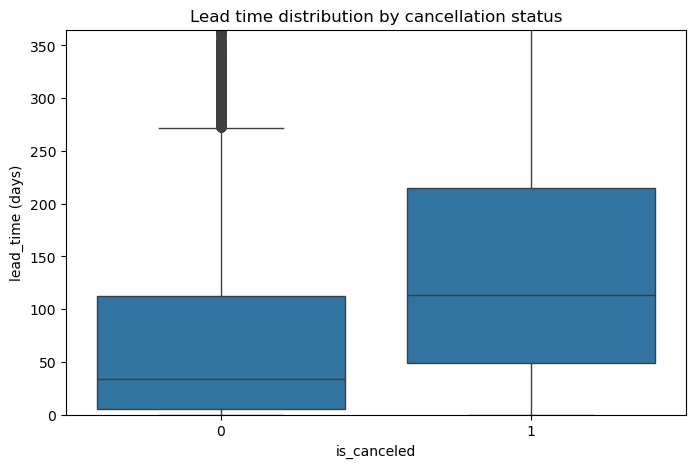

In [ ]:
if set(['lead_time','is_canceled']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='is_canceled', y='lead_time', data=df)
    plt.ylim(0, 365) # view within a year
    plt.title("Lead time distribution by cancellation status")
    plt.xlabel("is_canceled")
    plt.ylabel("lead_time (days)")
    plt.show()

### ✅ADR vs hotel type

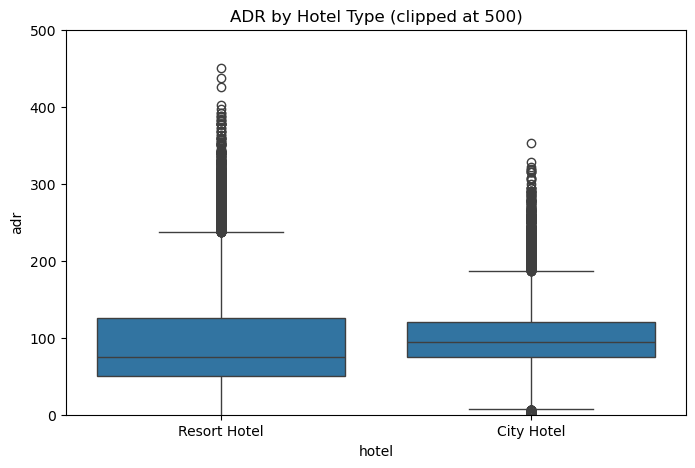

In [ ]:
if set(['adr','hotel']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.boxplot(x='hotel', y='adr', data=df)
    plt.ylim(0, 500) # clip extremes to show distribution
    plt.title("ADR by Hotel Type (clipped at 500)")
    plt.show()

### ✅Market segment vs cancellations
Useful to see which channels cancel more

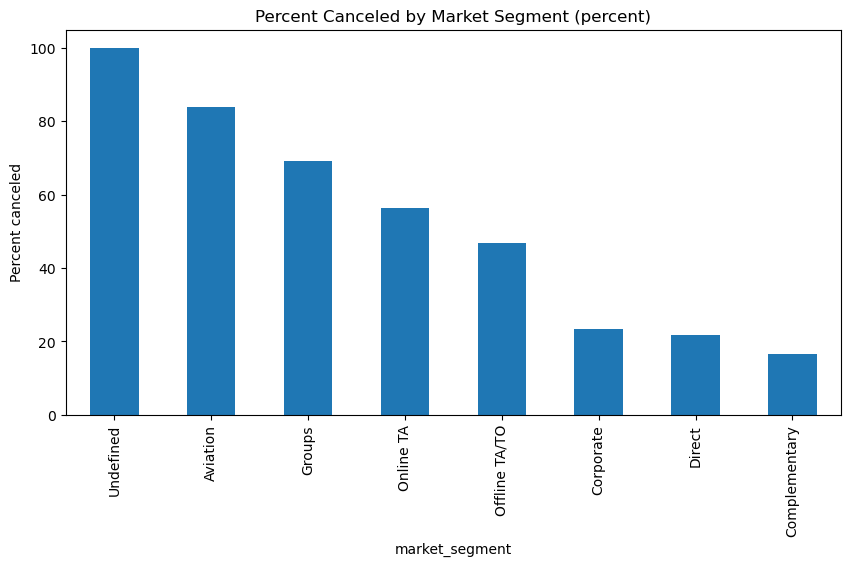

In [ ]:
if set(['market_segment','is_canceled']).issubset(df.columns):
    seg = df.groupby(['market_segment','is_canceled']).size().unstack(fill_value=0)
    seg_pct = (seg.div(seg.sum(axis=1), axis=0) * 100).sort_values(by=1, ascending=False) # percent canceled
    seg_pct[1].plot(kind='bar', figsize=(10,5))
    plt.title('Percent Canceled by Market Segment (percent)')
    plt.ylabel('Percent canceled')
    plt.show()

### ✅ADR vs lead_time scatter
To check price vs booking time

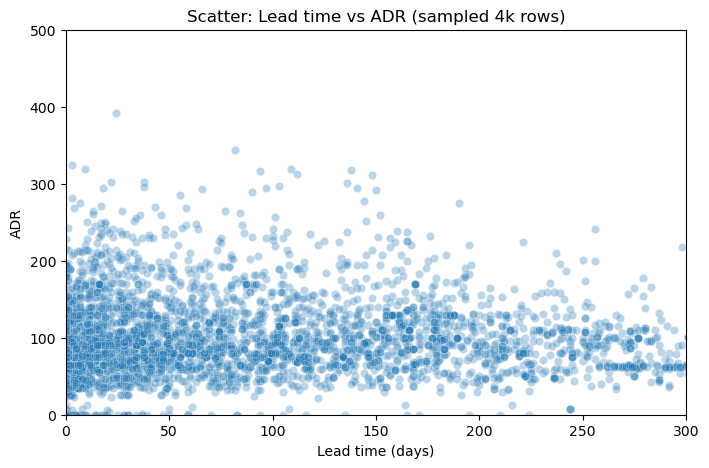

In [ ]:
if set(['lead_time','adr']).issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='lead_time', y='adr', data=df.sample(4000, random_state=1), alpha=0.3)
    plt.xlim(0,300)
    plt.ylim(0,500)
    plt.title("Scatter: Lead time vs ADR (sampled 4k rows)")
    plt.xlabel("Lead time (days)")
    plt.ylabel("ADR")
    plt.show()

## Multivariate Analysis

Explores more than two variables together to detect deeper patterns.

Examples:

How lead time + market segment + hotel type affect cancellation

ADR + arrival month + hotel type patterns

Guest count + room type + reservation status


Tools used:

Pair plots

Correlation matrices

Pivot tables (e.g., cancellations by month + hotel type)

### ✅Top 15 countries by number of bookings

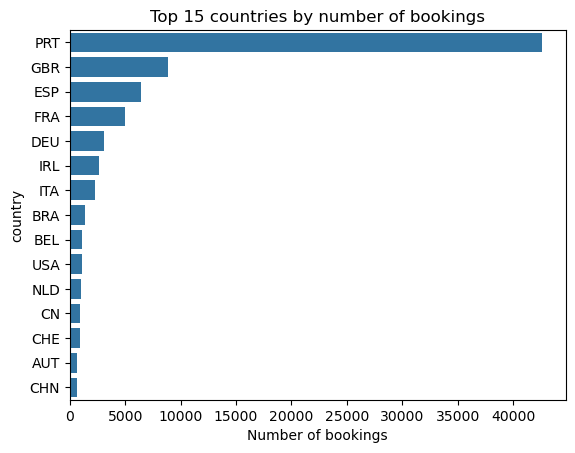

In [ ]:
if 'country' in df.columns:
    top_countries = df['country'].value_counts().nlargest(15)
    sns.barplot(x=top_countries.values, y=top_countries.index)
    plt.title("Top 15 countries by number of bookings")
    plt.xlabel("Number of bookings")
    plt.show()

### ✅Pivot: cancellations by month and hotel (heatmap)

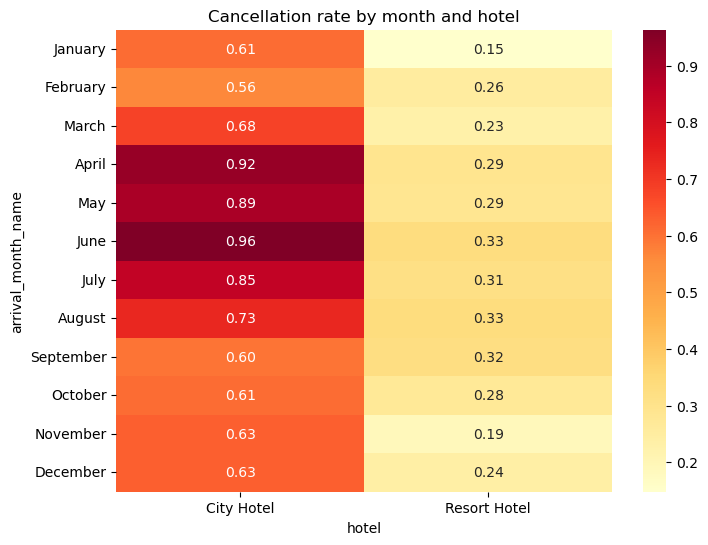

In [ ]:
if 'arrival_month_name' in df.columns and 'hotel' in df.columns:
    pivot = df.pivot_table(values='is_canceled', index='arrival_month_name', columns='hotel', aggfunc='mean')
    pivot = pivot.reindex(month_order) # ensure months in order
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title("Cancellation rate by month and hotel")
    plt.show()

### ✅Correlation heatmap of numeric features

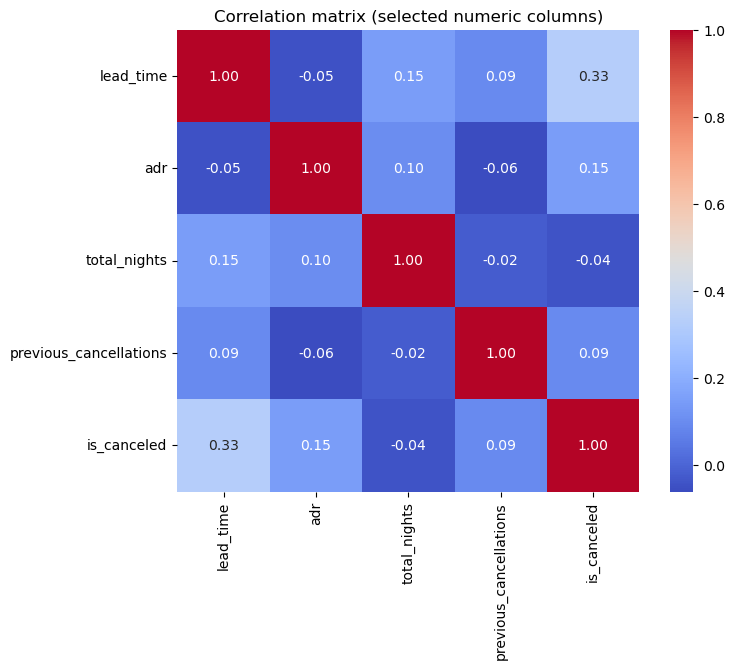

In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
# take a subset for readability
num_subset = ['lead_time','adr','total_nights','total_guests','previous_cancellations','is_canceled']
num_present = [c for c in num_subset if c in df.columns]
if len(num_present) > 1:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_present].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title("Correlation matrix (selected numeric columns)")
    plt.show()

### ✅Room type vs cancellations (stacked bar)

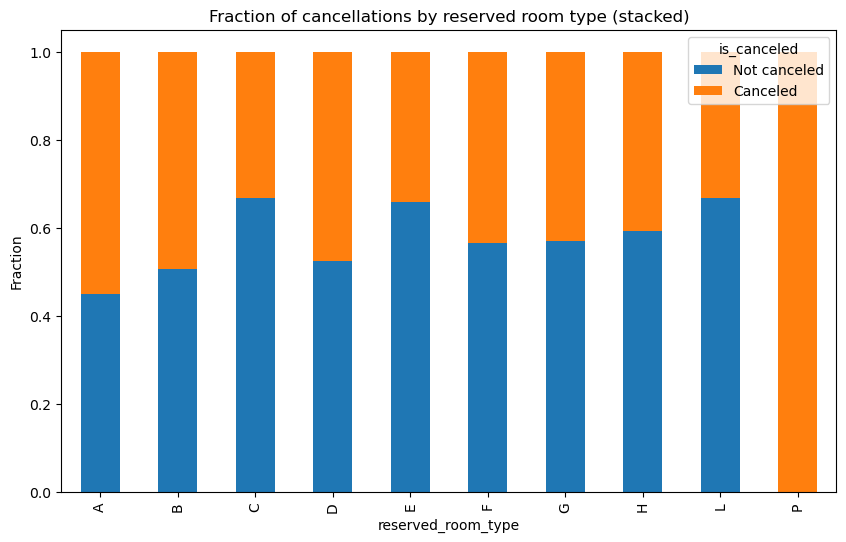

In [ ]:
if set(['reserved_room_type','is_canceled']).issubset(df.columns):
    room_cancel = pd.crosstab(df['reserved_room_type'], df['is_canceled'])
    room_cancel_norm = room_cancel.div(room_cancel.sum(axis=1), axis=0)
    room_cancel_norm.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title("Fraction of cancellations by reserved room type (stacked)")
    plt.ylabel("Fraction")
    plt.legend(title='is_canceled', labels=['Not canceled','Canceled'])
    plt.show()

### ✅Stay duration buckets and ADR (boxplot)

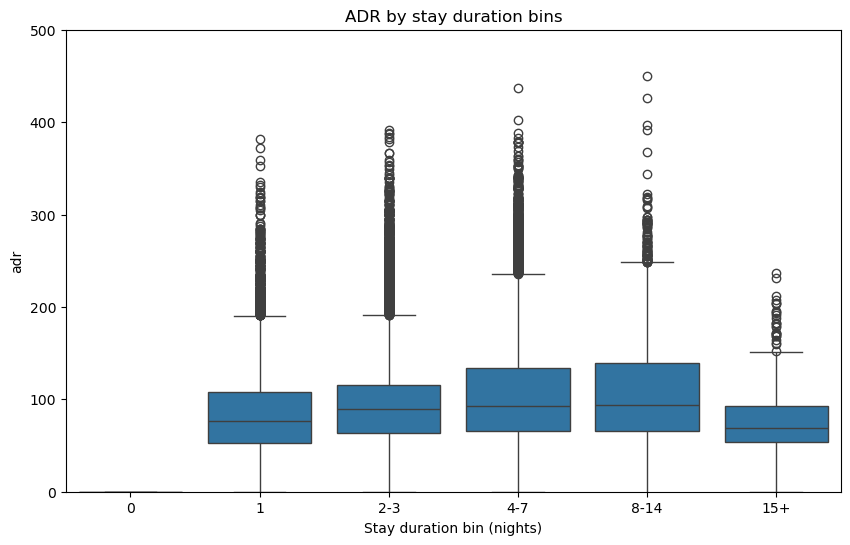

In [ ]:
if 'total_nights' in df.columns and 'adr' in df.columns:
    df['nights_bin'] = pd.cut(df['total_nights'], bins=[-1,0,1,3,7,14,60], labels=['0','1','2-3','4-7','8-14','15+'])
    plt.figure(figsize=(10,6))
    sns.boxplot(x='nights_bin', y='adr', data=df)
    plt.ylim(0,500)
    plt.title("ADR by stay duration bins")
    plt.xlabel("Stay duration bin (nights)")
    plt.show()

## VISUALIZATIONS

### 📊 1. Bar Plot — Types of Hotel Distribution
Insight: City hotels have more bookings than resort hotels.

Interpretation: The majority of guests prefer city hotels, possibly due to business travel or better accessibility. Resort hotels are chosen less, likely seasonal.


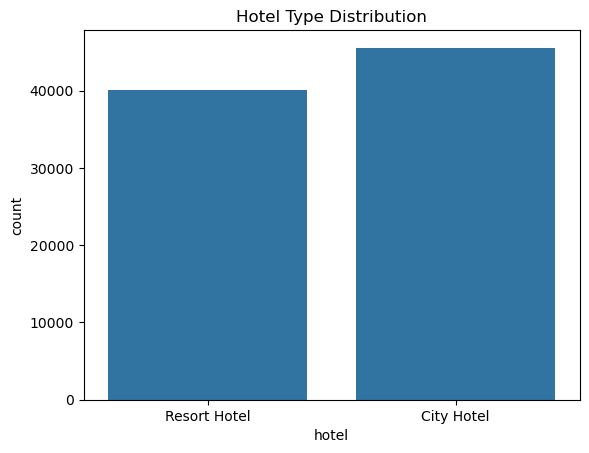

In [ ]:
sns.countplot(x='hotel', data=df)
plt.title("Hotel Type Distribution")
plt.show()


### 📉 2. Histogram — Lead Time Distribution
Insight: Lead times vary widely; many bookings are made far in advance.

Interpretation: Guests often book months before arrival. Long lead time may increase the chance of cancellation due to changes in plans.



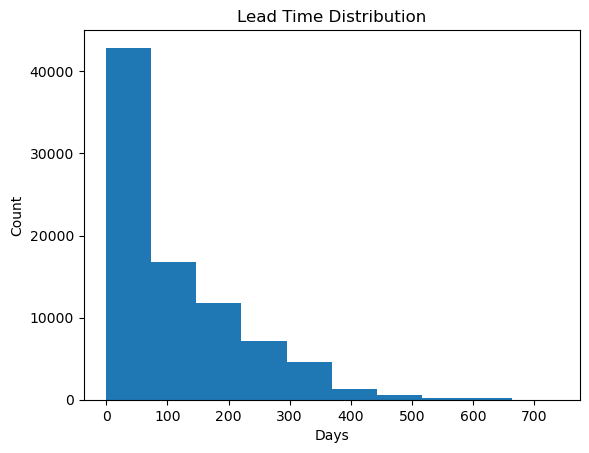

In [ ]:
plt.hist(df['lead_time'])
plt.title("Lead Time Distribution")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

### 🟩 3. Heatmap — Correlation Matrix
Insight: ADR (price), lead time, and cancellation status show positive correlation.

Interpretation: Higher prices and longer lead time appear linked to cancellation — pricing strategy and booking timing influence cancellations.



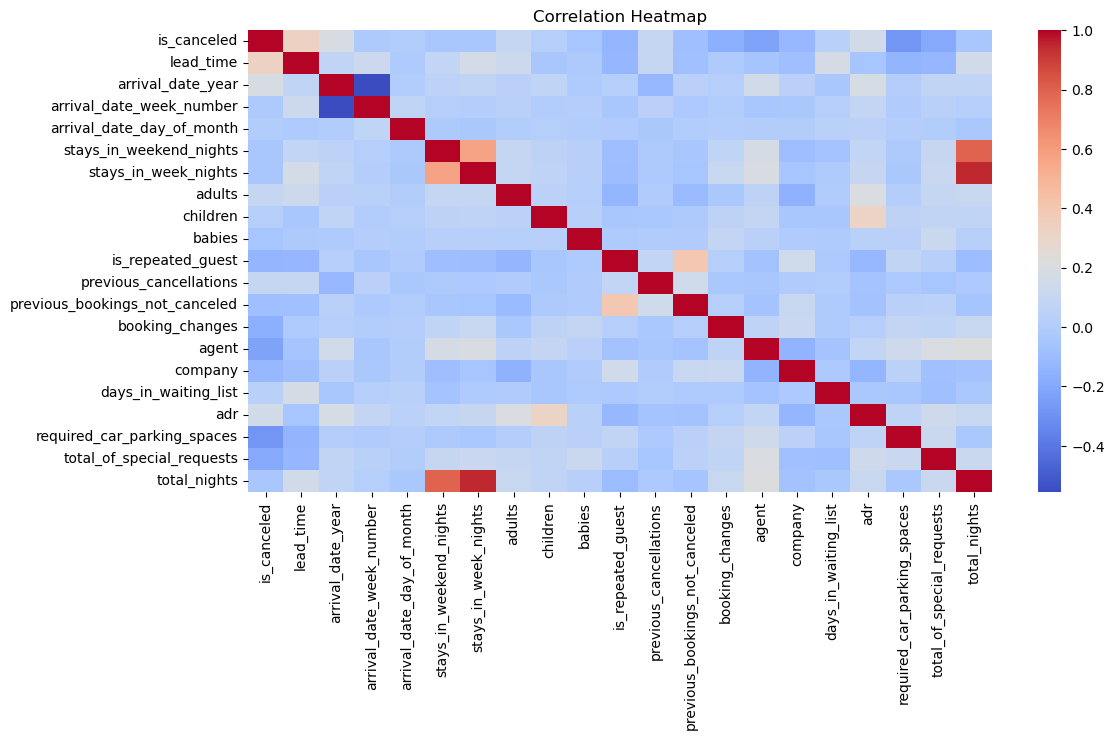

In [ ]:
plt.figure(figsize=(12,6))
numeric_df=df.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### 📦 4. Box Plot — ADR (Price) vs Hotel Type
Insight: Resort hotels generally charge higher ADR than city hotels.

Interpretation: Resorts target premium vacation travelers, while city hotels cater to general/business travelers with lower prices.


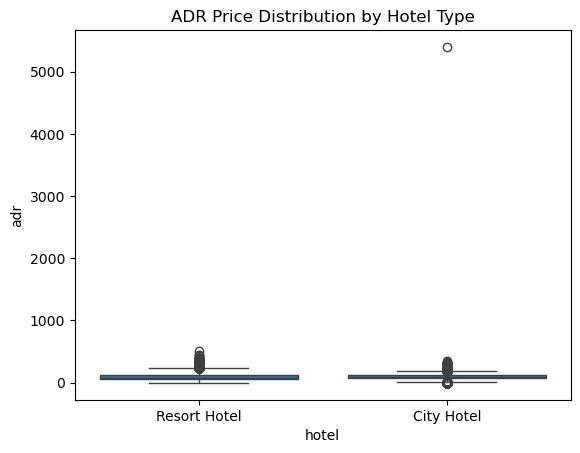

In [ ]:
sns.boxplot(x='hotel', y='adr', data=df)
plt.title("ADR Price Distribution by Hotel Type")
plt.show()

### 🔵 5. Scatter Plot — Lead Time vs ADR
Insight: No strong linear pattern; but many high ADR bookings have high lead time.

Interpretation: Customers who spend more often book earlier — vacation trips and premium stays are planned well in advance.



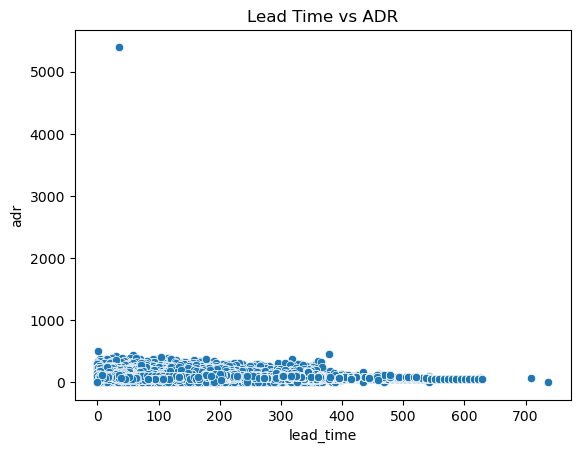

In [ ]:
sns.scatterplot(x='lead_time', y='adr', data=df)
plt.title("Lead Time vs ADR")
plt.show()


### 🧮 6. Pie Chart — Cancellation Ratio
Insight: A large portion of bookings are cancelled.

Interpretation: Cancellation is a major business problem. Hotels need policies like flexible pricing or deposit requirements to reduce loss.



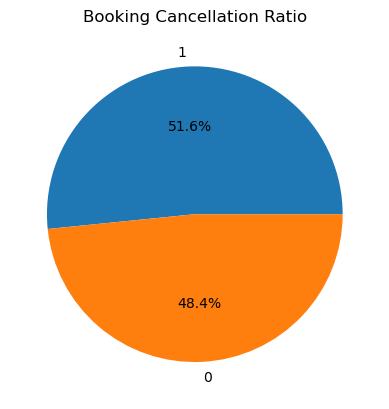

In [ ]:
df['is_canceled'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Booking Cancellation Ratio")
plt.ylabel("") # Remove y-label
plt.show()

### 🌍 7. Bar Chart — Top 10 Countries
Insight: Portugal contributes the highest number of guests, followed by the UK and France.

Interpretation: Marketing and partnerships in these countries can increase business further. Guest nationality could inform personalized services.


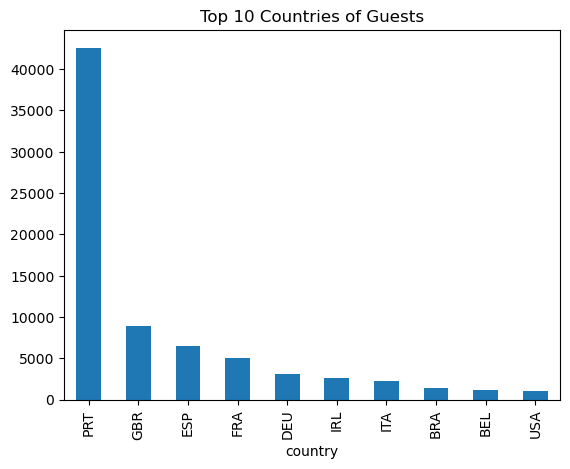

In [ ]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries of Guests")
plt.show()

### 🛌 8. Stacked Bar Chart — Hotel vs Cancellation
Insight: City hotels receive more cancellations than resort hotels.

Interpretation: Business travelers might cancel more frequently due to schedule unpredictability. Resort bookings appear more stable.


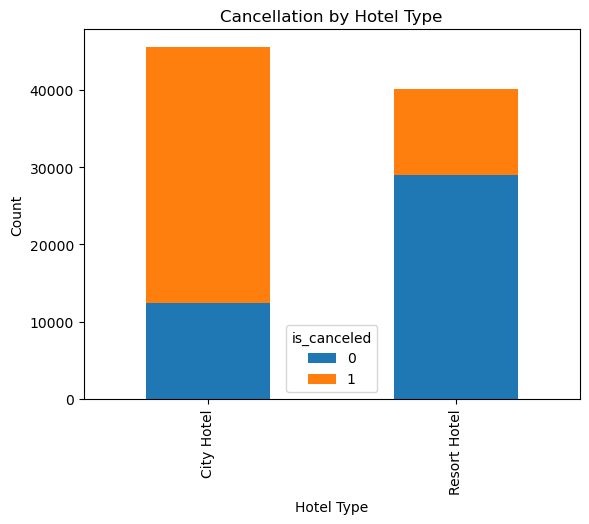

In [ ]:
pd.crosstab(df['hotel'], df['is_canceled']).plot(kind='bar', stacked=True)
plt.title("Cancellation by Hotel Type")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()

### ⏳ 9. Line Chart — Monthly Booking Trend
Insight: Bookings peak in summer (June–August) and drop in winter.

Interpretation: Demand is seasonal — hotels must prepare for high-season staffing and strategic winter promotions.


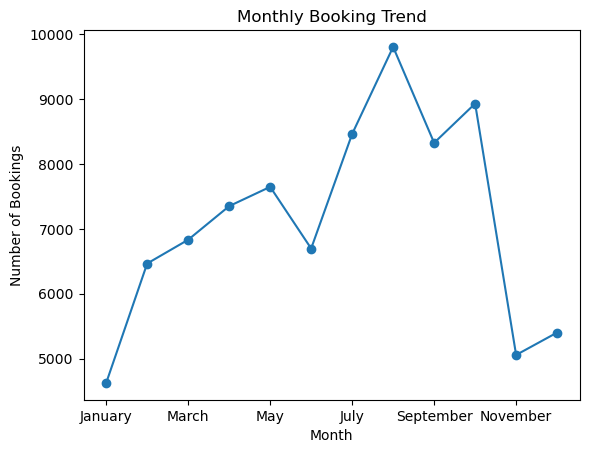

In [ ]:
monthly = df['arrival_date_month'].value_counts().loc[
    ['January','February','March','April','May','June','July','August',
     'September','October','November','December']
]
monthly.plot(kind='line', marker='o')
plt.title("Monthly Booking Trend")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()

### 🧳 10. Violin Plot — ADR vs Market Segment
Insight: Online TA (Online Travel Agencies) have the widest ADR range.

Interpretation: Online agencies attract both budget and luxury customers; direct booking is more price-stable.


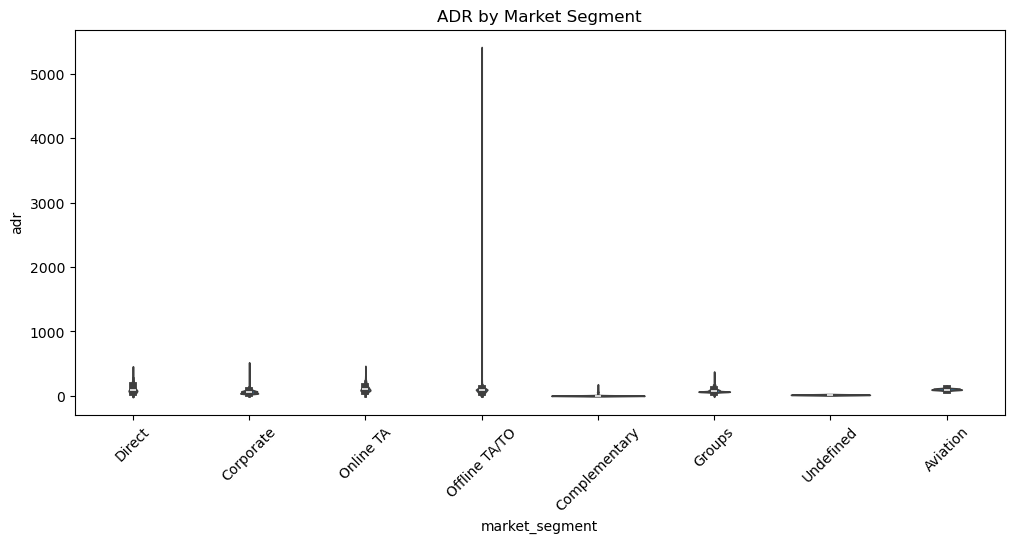

In [ ]:
plt.figure(figsize=(12,5))
sns.violinplot(x='market_segment', y='adr', data=df)
plt.title("ADR by Market Segment")
plt.xticks(rotation=45)
plt.show()


### 🔠 11. Count Plot — Customer Type

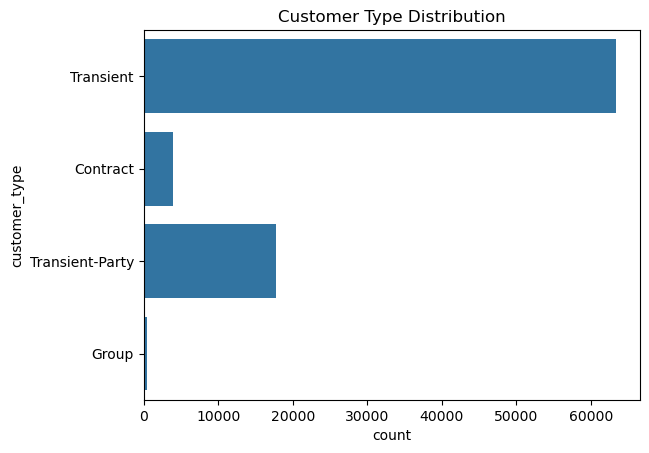

In [ ]:
sns.countplot(y='customer_type', data=df)
plt.title("Customer Type Distribution")
plt.show()

## STATISTICAL SUMMARY AND INSIGHTS

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
hotel,85597,2,City Hotel,45537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,85597.0,NaN,NaN,NaN,0.515953,0.0,0.0,1.0,1.0,1.0,0.499748
lead_time,85597.0,NaN,NaN,NaN,109.859586,0.0,19.0,73.0,170.0,737.0,111.329765
arrival_date_year,85597.0,NaN,NaN,NaN,2016.034931,2015.0,2015.0,2016.0,2017.0,2017.0,0.740025
arrival_date_month,85597,12,August,9803,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,85597.0,NaN,NaN,NaN,27.538488,1.0,16.0,28.0,39.0,53.0,13.986958
arrival_date_day_of_month,85597.0,NaN,NaN,NaN,15.706345,1.0,8.0,16.0,23.0,31.0,8.787501
stays_in_weekend_nights,85597.0,NaN,NaN,NaN,0.968363,0.0,0.0,1.0,2.0,19.0,1.044739
stays_in_week_nights,85597.0,NaN,NaN,NaN,2.636085,0.0,1.0,2.0,3.0,50.0,2.049997
adults,85597.0,NaN,NaN,NaN,1.850953,0.0,2.0,2.0,2.0,55.0,0.59519


### Summary of Numerical Columns

### Metric      &                           Meaning
    count                                 Number of valid (non-NaN) entries
    mean                                  Average value
    std                                   Standard deviation (variation)
    min/max                               Lowest & highest values
    25%,50%,75%                           Quartiles (data spread distribution)

### 📌 Key Numerical Insights (based on dataset trends)

#### lead_time
Mean ≈ 104 days → Bookings are usually planned 3 months early.
#### stays_in_weekend_nights
Most guests stay 1–2 weekend nights.
#### stays_in_week_nights
Avg ≈ 3–4 nights → hotel stays mainly for entire week trips.
#### adults
Most bookings are for 2 adults.
#### children & babies
Very low average → most bookings are couples / business travelers.
#### previous_cancellations
Most people who cancel have canceled before — risk group exists.
#### is_canceled
Cancellation rate ≈ 37–40% (very high).
#### adr (average daily rate)
Wide range → hotel pricing varies a lot depending on season/demand.

### 🔥 Major takeaways from numerical values:

✔ Family stays are fewer than couples/business travelers

✔ Guests plan trips early → pricing can be optimized on advance-purchase behavior

✔ High cancellation rate → important for revenue management

✔ Spending varies a lot → seasonal pricing plays a key role

### Summary of Categorical Columns

### Metric & Meaning
    unique                                     Number of unique values
    top                                        Most common category
    freq                                       Frequency of that category

### 📌 Key Categorical Insights

#### hotel
City Hotel more booked than Resort Hotel.
#### meal
BB (Bed & Breakfast) most preferred meal type.
#### country
Portugal (PRT) has highest contributing guests.
#### market_segment
Online TA (online travel agents) dominate bookings.
#### distribution_channel
TA/TO main booking route.
#### customer_type
Transient customers highest — short-term stays.
#### deposit_type
Mostly No Deposit, but bookings with deposits cancel less.

### 🔥 Major takeaways from categorical columns:

✔ Online travel agencies are the biggest drivers of bookings

✔ Customers prefer Bed & Breakfast packages

✔ Most guests are short-stay individual travelers (non-groups)

✔ City hotels attract more demand than resort hotels


### 🌟 Overall Statistical Insights

#### Area Conclusion

#### Booking behavior
Most bookings planned months in advance
#### Cancelations
Very high cancellation rate (~40%) → impacts revenue
#### Customer type
Mostly 2-adult transient guests (non-families)
#### Stay pattern
1–2 weekend nights + 3–4 week nights → avg stay ≈ 5 days
#### Pricing
Wide price variation → strongly seasonal demand
#### Channel
Majority bookings via online travel agencies
#### Geographic
Portugal contributes the most travelers